In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import time
import pandas as pd
from subprocess import Popen,PIPE
import sys
from scipy.signal import savgol_filter
from multiprocessing import Process

timeStepValueArray = np.array([0.01,0.03,0.05])
basicDataLocation = '/home/cm/CLionProjects/MDCode/AData/'

#most basic file to list function
def readDataFromFile(fileLocation):
    #open file
    file = open(fileLocation,'r')
    #read from the file
    text = file.readlines()
    returnValue = []
    for line in text:
        returnValue.append(float(line[:-1]))
    
    file.close()
    return returnValue

def plotNormal(datum1, datum2, labelX, labelY, imageSafeLocation):
    plt.rcParams['figure.figsize'] = [16,9] 
    plt.rc('font', size = 20)
    fig, ax = plt.subplots()
    ax.plot(datum1,datum2)
    ax.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
    ax.grid(which = 'minor', color = '#EEEEEE', linewidth = 0.5)
    ax.minorticks_on()
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.savefig(imageSafeLocation)
    plt.show()

def functionCall(timestepFactor):
    print("Working with timestep " + str(timestepFactor) + "\n")
    #file locations
    programbasePath = "/home/cm/CLionProjects/MDCode/cmake-build-release/"
    programName = "myproject"
    programCall = programbasePath + programName

    #call the c++ program  ,str(timestepFactor)
    process = Popen([programCall ,str(timestepFactor)],stdout = PIPE, stderr= PIPE)
    Popen.wait(process)
    stdout, stderr = process.communicate()
    print(stdout)
    print(stderr)

def dataMaker():
    imageSafeLocation = basicDataLocation + "/totalEnergyDrift" + ".png"
    
    start = time.time()
    energyFileLocation = ""
    temperaturFileLocation = ""
    #call
    for steps in range(len(timeStepValueArray)):
        functionCall(timeStepValueArray[steps])
        ###
        energyFileLocation = basicDataLocation + "/energy" + str(timeStepValueArray[steps]) + ".txt"
        energy = readDataFromFile(energyFileLocation)
        timeInABottle = np.arange(start = 0,stop = len(energy), step = 1)
        ###
        imageSafeLocation = basicDataLocation + "/totalEnergyDrift" + str(timeStepValueArray[steps]) + ".png"
        labelX = ""
        labelY = ""
        plotNormal(timeInABottle , energy, labelX,labelY, imageSafeLocation)
    
    end = time.time()
    print("Done in")
    print(end - start)
    
def nicePlotter():
    imageSafeLocation = basicDataLocation + "/totalEnergyDrift" + ".png"
    #data
    energyFileLocation = basicDataLocation + "/energy" + str(timeStepValueArray[0]) + ".txt"
    energy1 = readDataFromFile(energyFileLocation)
    energyFileLocation = basicDataLocation + "/energy" + str(timeStepValueArray[1]) + ".txt"
    energy2 = readDataFromFile(energyFileLocation)
    energyFileLocation = basicDataLocation + "/energy" + str(timeStepValueArray[2]) + ".txt"
    energy3 = readDataFromFile(energyFileLocation)
    timeInABottle = np.arange(start = 0,stop = len(energy2), step = 1)
    
    #plot
    plt.rcParams['figure.figsize'] = [16,18] 
    plt.rc('font', size = 20)
    fig, axs = plt.subplots(3,1)
    #1
    axs[0].plot(timeInABottle,energy1,'-')
    axs[0].title.set_text("Simulation with a timestep of "+str(timeStepValueArray[0]))
    axs[0].grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
    axs[0].grid(which = 'minor', color = '#EEEEEE', linewidth = 0.5)
    axs[0].minorticks_on()
    axs[0].set_ylabel("Energy")
    axs[0].tick_params(axis= 'x',labelbottom = False)
    axs[0].set_xlim(auto = True)
    #2
    axs[1].plot(timeInABottle,energy2,'-' )
    axs[1].title.set_text("Simulation with a timestep of "+str(timeStepValueArray[1]))
    axs[1].grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
    axs[1].grid(which = 'minor', color = '#EEEEEE', linewidth = 0.5)
    axs[1].minorticks_on()
    axs[1].set_ylabel("Energy")
    axs[1].tick_params(axis= 'x',labelbottom = False)
    axs[1].set_xlim(auto = True)
    #3
    axs[2].plot(timeInABottle,energy3,'-')
    axs[2].title.set_text("Simulation with a timestep of "+str(timeStepValueArray[2]))
    axs[2].grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
    axs[2].grid(which = 'minor', color = '#EEEEEE', linewidth = 0.5)
    axs[2].minorticks_on()
    axs[2].set_ylabel("Energy")
    axs[2].set_xlim(auto = True)
    axs[2].set_xlabel("Timesteps")
    plt.savefig(imageSafeLocation)
    plt.show()
    return imageSafeLocation
    
    

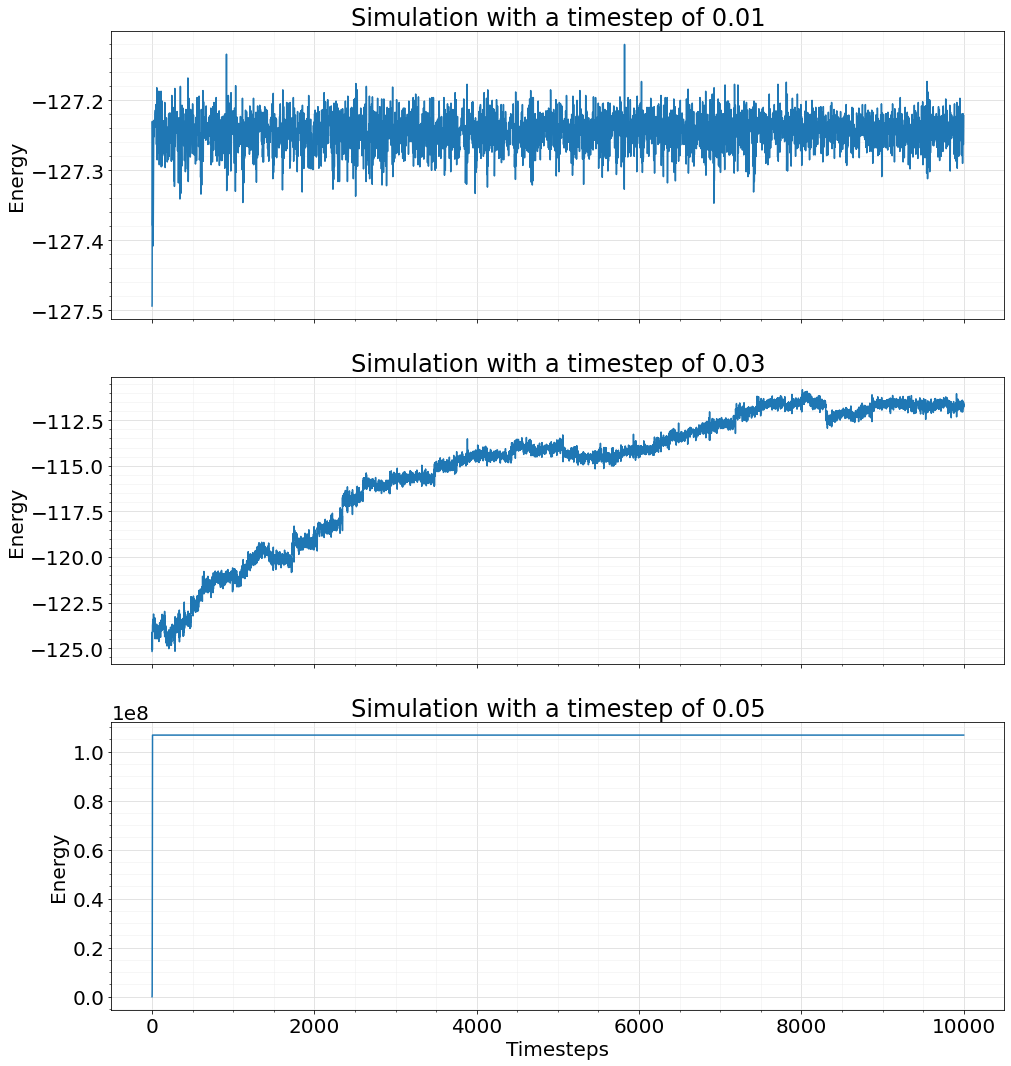

'/home/cm/CLionProjects/MDCode/AData//totalEnergyDrift.png'

In [59]:
#dataMaker()
nicePlotter()